## Principal Component Analysis


                                                                                                    - M.Naga Charitavya
                                                                                                        AP21110010027

### 1. Consider the two dimensional data matrix [(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)]. Implement principal component analysis. Use this to obtain the feature in transformed 2D feature space. Plot the scatter plot of data points in both the original as well as transformed domain.

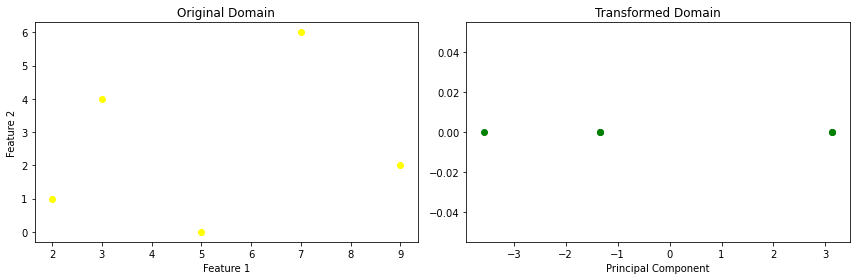

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)])

mean = np.mean(data, axis=0)

centered_data = data - mean

cov_matrix = np.cov(centered_data.T)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

k = 1
transform_matrix = eigenvectors[:, :k]

transformed_data = np.dot(centered_data, transform_matrix)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c='Yellow')
plt.title('Original Domain')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(transformed_data[:, 0], np.zeros(len(transformed_data)), c='Green')
plt.title('Transformed Domain')
plt.xlabel('Principal Component')
plt.ylabel('')

plt.tight_layout()
plt.show()

### 2. Implement Principal Component Analysis Algorithm and use it to reduce dimensions of Iris Dataset (from 4D to 2D). Plot the scatter plot for samples in the transformed domain with different colour codes for samples belonging to different classes.

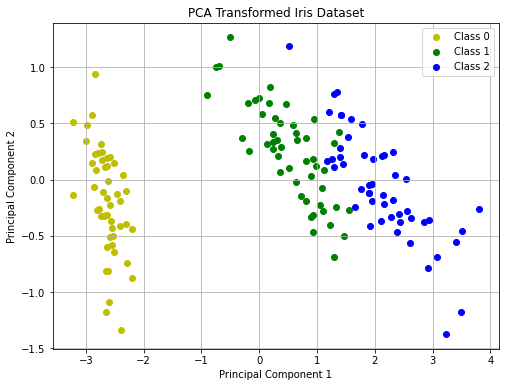

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data
target = iris.target

mean = np.mean(data, axis=0)

centered_data = data - mean

cov_matrix = np.cov(centered_data.T)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

k = 2
transform_matrix = eigenvectors[:, :k]

transformed_data = np.dot(centered_data, transform_matrix)

plt.figure(figsize=(8, 6))
colors = ['y', 'g', 'b']
for i, label in enumerate(np.unique(target)):
    plt.scatter(transformed_data[target == label, 0], transformed_data[target == label, 1], label=f'Class {label}', c=colors[i])

plt.title('PCA Transformed Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()